In [1]:
import shap
import qiime2
from sklearn.pipeline import Pipeline
import pandas as pd
import biom
%matplotlib inline
shap.initjs()
import matplotlib.pyplot as plt

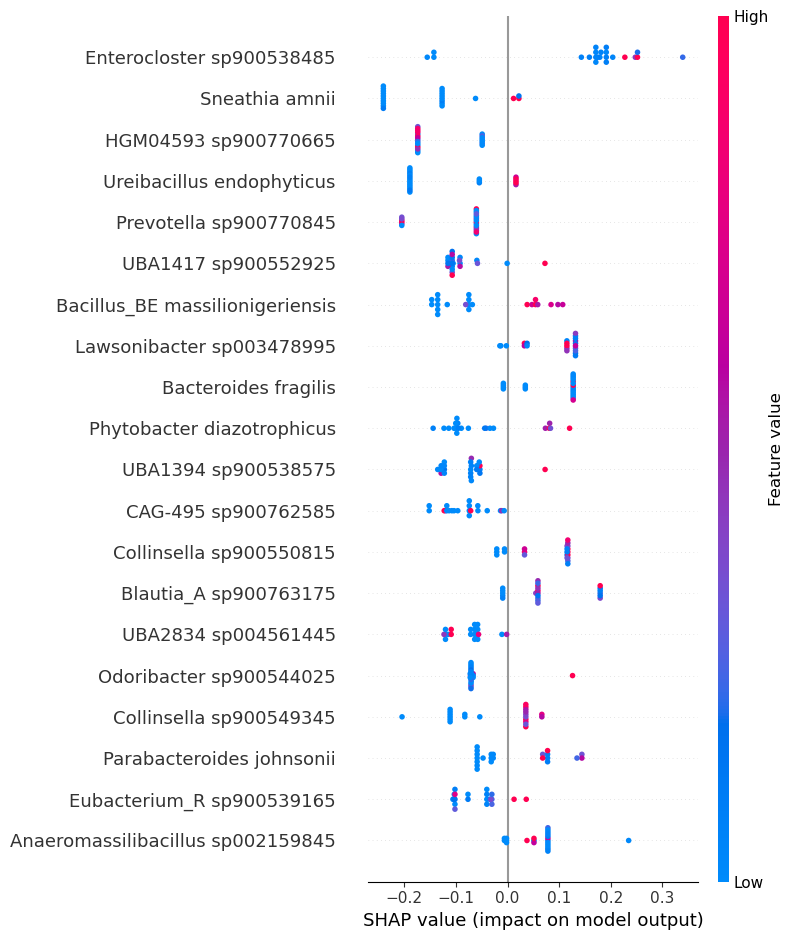

In [14]:
#5. Franzosa2019 -- Crohn’s Disease (IBD-CD)
fname = '../../../snakemake/data/Franzosa2019IBD/classify/GB-pictures-classifier_CD_no_feature_selection/probabilities.qza'
pred_probs = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Franzosa2019IBD/classify/GB-pictures-classifier_CD_no_feature_selection/feature_importance.qza'
feature_importances = qiime2.Artifact.load(fname).view(pd.DataFrame)

fname = '../../../snakemake/data/Franzosa2019IBD/Franzosa2019CD_filtered.biom'
table = biom.load_table(fname).to_dataframe().T
X_test = table.loc[pred_probs.index, feature_importances.index]

fname = '../../../snakemake/data/Franzosa2019IBD/Metadata_CD_matched.txt'
md_test = pd.read_table(fname, index_col=0).loc[X_test.index]

fname = '../../../snakemake/data/Franzosa2019IBD/classify/GB-pictures-classifier_CD_no_feature_selection/sample_estimator.qza'
model = qiime2.Artifact.load(fname).view(Pipeline)
explainer = shap.TreeExplainer(model['est'])
#shap_values = explainer.shap_values(X_test)

shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
#shap.plots.heatmap(shap_values,feature_values=shap_values.abs.max(0), show=False)
#plt.title('CD SHAP')
#plt.

In [18]:
pred_probs

,CD,Healthy
id,,
SRR6468505,0.435064,0.564936
SRR6468617,0.081121,0.918879
SRR6468542,0.083667,0.916333
SRR6468528,0.098270,0.901730
SRR6468595,0.913662,0.086338
SRR6468629,0.917454,0.082546
SRR6468557,0.786552,0.213448
SRR6468534,0.793164,0.206836
SRR6468652,0.897884,0.102116


In [19]:
md_test

,geo_loc_name_country,Age,Status,# Feature_Sample,match_ids_column,Batch_IDs
id,,,,,,
SRR6468505,USA,24,CD,PRISM|8878,48.0_USA_CD,8
SRR6468617,USA,30,Healthy,PRISM|8754,43.0_USA_CD,8
SRR6468542,Netherlands,36,Healthy,Validation|LLDeep_0033,9.0_Netherlands_CD,7
SRR6468528,USA,25,Healthy,PRISM|7912,39.0_USA_CD,8
SRR6468595,USA,30,CD,PRISM|8550,55.0_USA_CD,8
SRR6468629,USA,21,CD,PRISM|8746,11.0_USA_CD,8
SRR6468557,Netherlands,42,CD,Validation|UMCGIBD00106,19.0_Netherlands_CD,7
SRR6468534,Netherlands,30,CD,Validation|UMCGIBD00032,16.0_Netherlands_CD,7
SRR6468652,USA,58,CD,PRISM|7843,14.0_USA_CD,8


Text(0.5, 1.0, 'CD SHAP global')

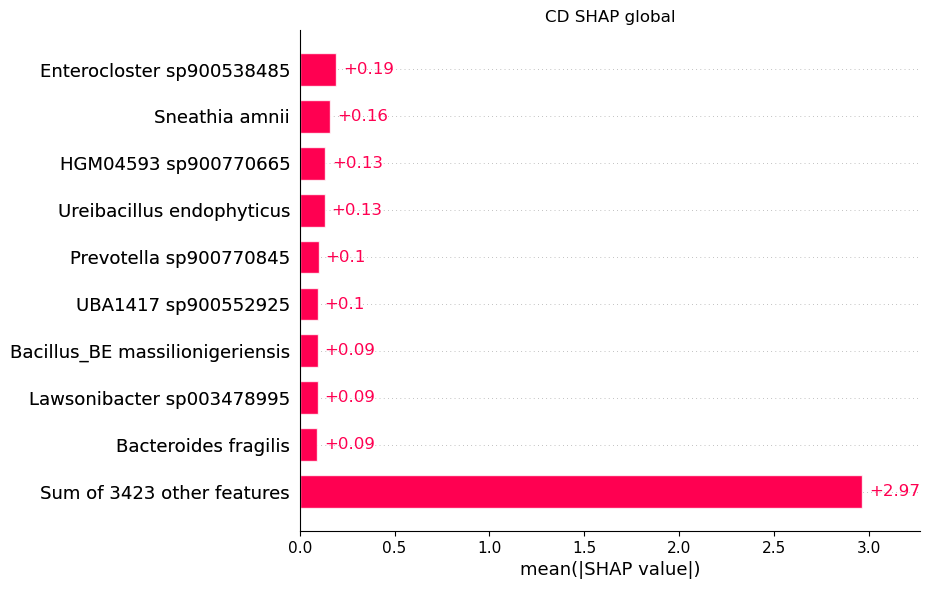

In [15]:
shap.plots.bar(shap_values,show=False)
plt.title('CD SHAP global')
#plt.savefig('CD_barplot_global_new.pdf', bbox_inches = "tight")

Text(0.5, 1.0, 'CD SHAP local - SRR6468505 - Case')

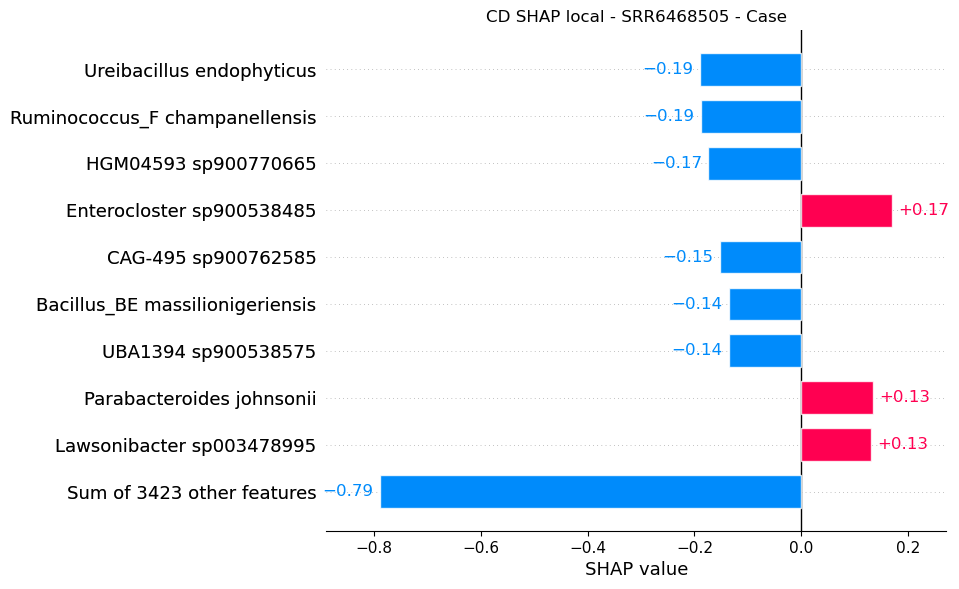

In [22]:
shap.plots.bar(shap_values[0],show=False)
plt.title('CD SHAP local - SRR6468505 - Case')
#plt.savefig('CD_barplot_local_0.pdf', bbox_inches = "tight")

Text(0.5, 1.0, 'CD SHAP local - SRR6468617 - Healthy')

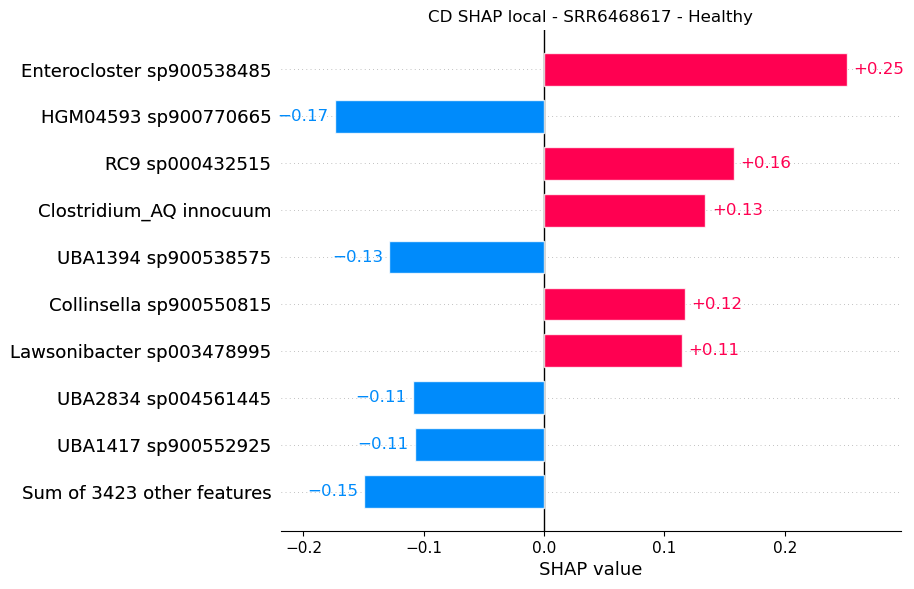

In [23]:
shap.plots.bar(shap_values[1],show=False)
plt.title('CD SHAP local - SRR6468617 - Healthy')
#plt.savefig('CD_barplot_local_0.pdf', bbox_inches = "tight")

Text(0.5, 1.0, 'CD SHAP local - SRR6468542 - Healthy')

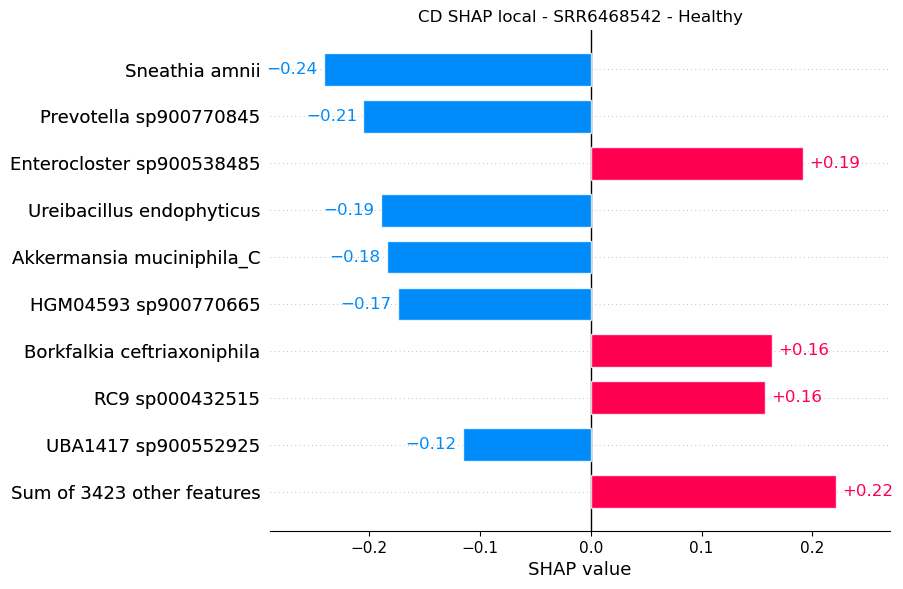

In [24]:
shap.plots.bar(shap_values[2],show=False)
plt.title('CD SHAP local - SRR6468542 - Healthy')
#plt.savefig('CD_barplot_local_0.pdf', bbox_inches = "tight")

Text(0.5, 1.0, 'CD SHAP local - SRR6468595 - Case')

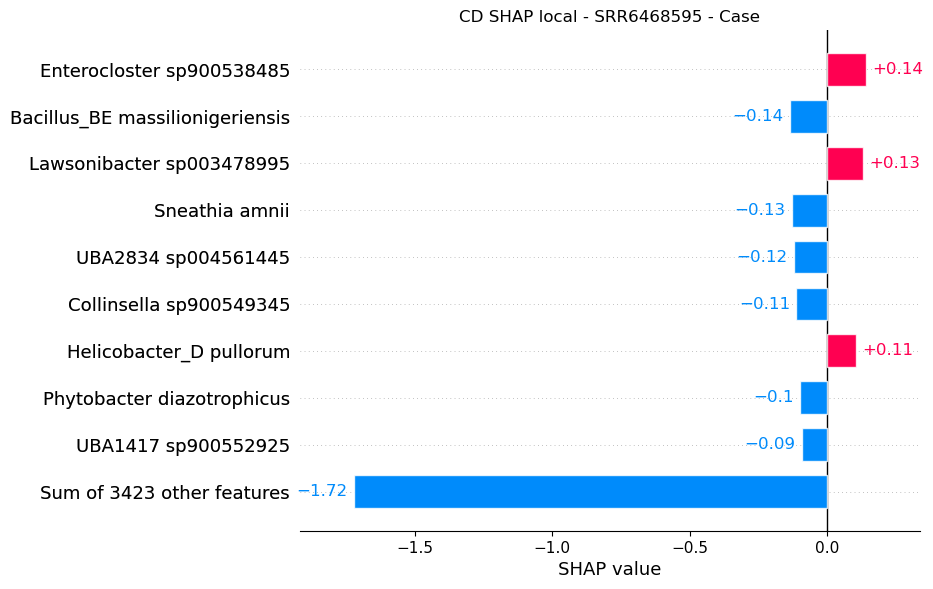

In [25]:
shap.plots.bar(shap_values[4],show=False)
plt.title('CD SHAP local - SRR6468595 - Case')
#plt.savefig('CD_barplot_local_0.pdf', bbox_inches = "tight")

In [7]:
shap_values = explainer.shap_values(X_test)
df = pd.DataFrame(shap_values, columns = X_test.columns, index = X_test.index )
df_new = df.loc[:, (df != 0).any(axis=0)]
df_new.sum(axis=1)

id
SRR6468505   -1.326232
SRR6468617    0.106090
SRR6468542   -0.374743
SRR6468528   -0.481832
SRR6468595   -2.027211
SRR6468629   -1.968349
SRR6468557   -0.917333
SRR6468534   -1.286317
SRR6468652   -1.553438
SRR6468597   -0.989716
SRR6468648   -0.042714
SRR6468642   -1.462034
SRR6468545   -1.059767
SRR6468559   -0.486843
SRR6468678   -0.777155
SRR6468554   -2.372860
SRR6468669   -1.769257
SRR6468674   -1.075429
SRR6468707   -1.292563
SRR6468547   -1.069978
SRR6468552   -1.073622
SRR6468706   -0.962486
dtype: float64

In [8]:
shap_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
fname = '../../../snakemake/data/Franzosa2019IBD/Franzosa2019CD_filtered.biom'
table = biom.load_table(fname)
#models = sample_estimator['est']
#explainer = shap.TreeExplainer(models)
#features = table.to_dataframe()
features = table.to_dataframe()#.T
#featureids = sample_estimator.named_steps.dv.get_feature_names()
featureids = model.named_steps.dv.get_feature_names()
features = features.loc[featureids]
shap_values = explainer.shap_values(features.T.values)
sampleids = table.ids()
shap_values = pd.DataFrame(shap_values, index=sampleids,columns=featureids)
shap_values
# remove all 0 columns
df = shap_values
df_new = df.loc[:, (df != 0).any(axis=0)]
df_new

,Acetatifactor sp900766575,Acidaminococcus sp900554515,Aeromonas rivipollensis,Agathobacter sp900550545,Agathobaculum butyriciproducens,Agathobaculum sp900291975,Agathobaculum sp900544475,Agathobaculum sp900557315,Alistipes communis,Alistipes onderdonkii,...,UMGS1633 sp900553645,UMGS1696 sp900753285,UMGS1865 sp900768535,UMGS1889 sp900556055,UMGS2069 sp900557695,UMGS902 sp900761025,UMGS951 sp900547585,Veillonella sp900545205,Veillonella tobetsuensis,Victivallis vadensis
SRR6468622,0.185769,0.000000e+00,8.673617e-19,-0.010908,0.036969,1.734723e-18,0.000000e+00,-0.019300,0.017525,-0.057689,...,0.019887,-0.027338,-0.023765,0.000000e+00,0.0,-0.110084,0.115290,0.003081,0.086750,0.000836
SRR6468661,-0.011458,4.336809e-19,-1.029992e-18,-0.031451,-0.021896,0.000000e+00,0.000000e+00,-0.007753,-0.005808,0.000889,...,-0.052131,-0.008483,-0.025465,4.336809e-19,0.0,-0.053861,-0.020962,0.001671,0.009501,0.001862
SRR6468613,-0.005375,3.252607e-19,-1.301043e-18,-0.007057,0.010964,1.084202e-19,0.000000e+00,0.001465,0.086482,0.004352,...,0.131429,0.008050,-0.024869,0.000000e+00,0.0,0.113562,0.018473,0.008905,-0.002164,0.005711
SRR6468676,-0.034832,-1.084202e-19,8.673617e-19,-0.031451,-0.013436,6.505213e-19,0.000000e+00,-0.017518,-0.010689,0.000889,...,-0.039680,0.001104,-0.009752,2.168404e-19,0.0,-0.059677,-0.006852,0.001671,-0.001188,0.001862
SRR6468548,0.028667,0.000000e+00,3.469447e-18,0.159346,0.034835,-1.084202e-19,0.000000e+00,0.006433,0.086482,0.004352,...,0.116143,-0.027535,-0.022963,0.000000e+00,0.0,0.107375,0.115290,0.003081,-0.002486,0.000836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR6468662,0.028667,4.336809e-19,3.469447e-18,-0.031451,-0.015421,-2.168404e-19,0.000000e+00,0.005839,0.024432,0.000889,...,0.041363,-0.096604,-0.022854,2.168404e-19,0.0,0.026775,-0.020962,0.001671,-0.001188,0.001862
SRR6468551,-0.034832,0.000000e+00,8.673617e-19,-0.031451,0.008568,0.000000e+00,0.000000e+00,-0.007753,-0.005808,-0.032015,...,-0.044333,-0.013248,-0.011822,0.000000e+00,0.0,-0.055870,-0.021215,0.001671,-0.001188,0.001862
SRR6468671,-0.011458,2.168404e-19,8.673617e-19,-0.030352,-0.028716,8.673617e-19,0.000000e+00,-0.003540,-0.005808,0.000889,...,-0.052131,-0.027338,0.022402,4.336809e-19,0.0,-0.053861,-0.006852,-0.025072,-0.001188,0.001862
SRR6468547,0.028667,3.252607e-19,-6.938894e-18,0.055146,0.005206,-1.084202e-19,-4.336809e-19,0.001465,0.014459,0.004352,...,0.041668,0.002295,-0.065844,0.000000e+00,0.0,0.032162,0.032382,0.003081,-0.010844,0.005711


In [6]:
df_new.sum(axis=1)

SRR6468622    2.657739
SRR6468661   -2.657739
SRR6468613    2.657739
SRR6468676   -2.657739
SRR6468548    2.657739
                ...   
SRR6468662   -2.657739
SRR6468551   -2.657739
SRR6468671   -2.657739
SRR6468547    1.272180
SRR6468577    2.657739
Length: 108, dtype: float64

In [11]:
explainer.shap_values(features.T.values)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])